In [1]:
import matplotlib.pyplot as plt
import numpy as np

In the paper **"[DO-climate events are noise induced: statistical investigation of the claimed 1470 years cycle](https://documentcloud.adobe.com/gsuiteintegration/index.html?state=%7B%22ids%22%3A%5B%221HBNGw-wEX6gBs1LXgeQDD5kl0547FxQ7%22%5D%2C%22action%22%3A%22open%22%2C%22userId%22%3A%22105388653003422404836%22%2C%22resourceKeys%22%3A%7B%7D%7D)"**, by *P.D. Ditlevsen, K.K. Andersen, and A. Svensson* (2006), a possible periodicity of about 1500 years for the Dansgaard-Oeschger (DO) events,observed in the Greenland ice cores is discussed.

Acording to Wikipedia, [Dansgaard–Oeschger events](https://en.wikipedia.org/wiki/Dansgaard%E2%80%93Oeschger_event) are rapid climate fluctuations that occurred during the last glacial period. Some scientists say that the events occur quasi-periodically with a recurrence time being a multiple of 1,470 years, but this is debated.

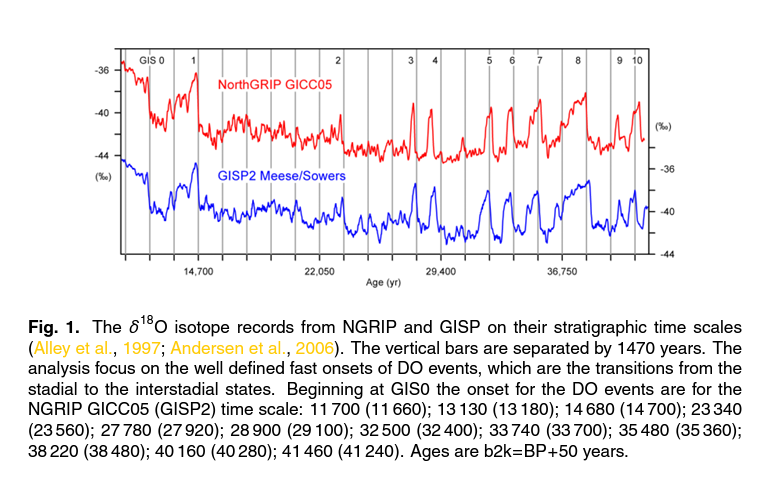


B.P. (Before the Present) is the number of years before the present. Because the present changes every year, archaeologists, by convention, use A.D. 1950 as their reference. So, 2000 B.P. is the equivalent of 50 B.C.

In geochemistry, paleoclimatology and paleoceanography δ<sup>18</sup>O or delta-O-18 is a measure of the ratio of stable isotopes oxygen-18 (<sup>18</sup>O) and oxygen-16 (<sup>16</sup>O). It is commonly used as a measure of the temperature of precipitation, as a measure of groundwater/mineral interactions, and as an indicator of processes that show isotopic fractionation, like methanogenesis. In paleosciences, <sup>18</sup>O:<sup>16</sup>O data from corals, foraminifera and ice cores are used as a proxy for temperature.

Identifiying a DO event is not an easy task, and there are discussions about the actual definition of what a "rapid fluctuation" is. Of course we do not enter in this discussion, and adopt the list reported by *Rahmstorf* (2000) in "**[Timing of abrupt climate change: A precise clock](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2003GL017115)**".



In [2]:
DOevts = [11605, 13073, 14630, 23398, 27821, 29021, 32293, 33581, 35270, 38387, 41143, 42537, 45362]

Let's now code a function to compute the Rayleigh periodogram:

In [3]:
def z2n(freqs, time, harm=1):
    '''
    z2n(freqs,time[, harm])
    Description
    -----------
    A python implementation of the Rayleigh Z_n^2 method to calculate the power
    spectrum of a time series in a given range of frequencies
    Caculates a periodogram, using Fourrier-analysis trough
    a method using the statistical variable Z^2_n wich has a
    probability density funcion equal to that of a X^2 (chi-squared)
    with 2n degrees of freedom
    Input
    ----------
    freqs: an array with frequencies in units of 1/[time]
    time: an array with the time series where to find a period
    harm: [optional] harmonic of the Fourrier analysis use higher harmonics to
    low signals.
    Returns
    ----------
      Z2n: An array with the powerspectrum of the time series
    '''
    freqs = np.asarray(freqs)
    time = np.asarray(time)
    N = len(time)
    Z2n = []
    for ni in freqs:
        aux = 0
        for k in range(harm):
            Phi = (ni*time) % 1
            arg = (k+1)*Phi*2.0*np.pi
            phicos = np.cos(arg)
            phisin = np.sin(arg)
            aux = aux + (phicos.sum())**2 + (phisin.sum())**2
        Z2n.append((2.0/N)*aux)

    return np.asarray(Z2n)

We study possible periods from 100 to 10000 years.

In [4]:
per = np.arange(100,10000,100)
freq = 1./per
res = z2n(freq,np.array(DOevts))

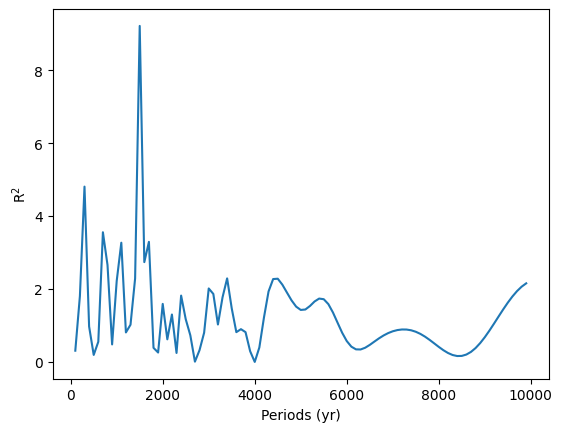

In [5]:
plt.plot(per,res)
plt.xlabel("Periods (yr)")
plt.ylabel("R$^2$");

Given that with large N (and indeed this is NOT the case) the Rayleigh statistics follow the $\chi^2$ distribution with two degrees of freedom, it is easy to commpute the FAP for the observed periodogram peak. Evaluating the number of independent periods (or frequncies) allowed by the input data is more difficult. In order to keep everything simple assume $N_{eff} \sim N/2$.

In [6]:
pmx = per[res.argmax()]
mx = res.max()
lfap = np.exp(-mx/2)
gfap = 1-(1-lfap)**(len(DOevts)/2.)
print (pmx,lfap,gfap)

1500 0.009983745514310876 0.06313910213725338


So that we have that the maximum is for period $P \sim 1500$ years, the local significance (given the assumptions discussed above) is $\sim 99.1\%$, while the global significance is $\sim 94\%$.

Too low for a firm claim.